### House Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
pca =pd.read_csv(r"C:\Users\Vicky Yewle\Downloads\Machine Learning\Datasets\PrincipalComponentAnalysis_PCA_\Principal Component Analysis (PCA)\Dataset\houseprice.csv")
pca.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
pca.shape

(1460, 81)

In [7]:
#Importing Data Auditor custom made function

class Data_Auditor:
    def NA_in_Data(data_frame):
        result = (data_frame.isnull().sum().sum()) / (data_frame.shape[0] * data_frame.shape[1]) * 100
        return(print("Data has",round(result,2),"% NA's"))
    
    def Remove_Columns(data_frame,*args):
        list_of_cols = list(args)
        data_frame.drop(list_of_cols,axis = 1,inplace = True)
        
    def NA_in_Columns(data_frame):
        total_missing = data_frame.isnull().sum().sort_values(ascending=False)
        percent_missing = round(((data_frame.isnull().sum()/data_frame.isnull().count()).sort_values(ascending=False)*100),1)
        missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Missing_Obs', 'Percent_of_NA'])
        return(missing_data.head(10))
        
    def Most_Frequent_Data(data_frame,Column):
        Count = data_frame[Column].value_counts()
        Percentage = round(((data_frame[Column].value_counts()/data_frame.shape[0])*100),2)
        Summary_data = pd.concat([Count, Percentage], axis=1, keys=['Count','Percentage'])
        return(Summary_data)
        
    def Remove_Outlier(data_frame,low,high):
        quant_df = data_frame.quantile([low, high])
        for cols in list(data_frame.columns):
            if data_frame[cols].dtypes == 'float64' or data_frame[cols].dtypes == 'int64':
                df = data_frame[(data_frame[cols] > quant_df.loc[low, cols]) & (data_frame[cols] < quant_df.loc[high, cols])]
                return(df)
                
    def Remove_Multicollinearity(data_frame,threshold):
        corr_matrix = data_frame.corr().abs() # Create correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > threshold)]# Find features with correlation greater than threshold
        data_frame.drop(to_drop, axis=1, inplace=True)# Drop features
        print(to_drop,'is removed')

In [8]:
Data_Auditor.NA_in_Columns(pca)

,Missing_Obs,Percent_of_NA
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageCond,81,5.5
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5


In [9]:
pca["PoolQC"]=pca["PoolQC"].fillna("No pool")
pca["MiscFeature"]=pca["MiscFeature"].fillna("No MiscFeature")
pca["Alley"]=pca["Alley"].fillna("No alley access")
pca["Fence"]=pca["Fence"].fillna("No Fence")
pca["FireplaceQu"]=pca["FireplaceQu"].fillna("No fireplace")

In [10]:
pca.groupby('Neighborhood')['LotFrontage'].median()

pca['LotFrontage'] = pca['LotFrontage'].fillna(pca.groupby('Neighborhood')['LotFrontage'].transform('median'))

In [11]:
del pca['Id']

In [12]:
Garage_cols=[columns for columns in pca if columns.startswith('Garage')]

for columns in Garage_cols:
    if pca[columns].dtypes =='float64':
        pca[columns]=0
    else:
        pca[columns]='No_Garage'

del Garage_cols

In [13]:
Data_Auditor.NA_in_Data(pca)
Data_Auditor.NA_in_Columns(pca)

Data has 0.17 % NA's


,Missing_Obs,Percent_of_NA
BsmtFinType2,38,2.6
BsmtExposure,38,2.6
BsmtQual,37,2.5
BsmtFinType1,37,2.5
BsmtCond,37,2.5
MasVnrType,8,0.5
MasVnrArea,8,0.5
Electrical,1,0.1
ExterQual,0,0.0
RoofMatl,0,0.0


In [14]:
Basement_cols_data = pca.loc[:,pca.columns.str.contains("Basement")]
Basement_cols_data_2 = pca.loc[:,pca.columns.str.contains("Bsmt")]

Basement = pd.concat([Basement_cols_data,Basement_cols_data_2], axis=1)

del Basement_cols_data
del Basement_cols_data_2

for columns in Basement.columns:
    if pca[columns].dtypes == "float64":
        pca[columns] = pca[columns].fillna(0)
    else:
        pca[columns] = pca[columns].fillna('No_Basement')
    
del Basement
del columns

In [15]:
Data_Auditor.NA_in_Data(pca)
Data_Auditor.NA_in_Columns(pca)

Data has 0.01 % NA's


,Missing_Obs,Percent_of_NA
MasVnrType,8,0.5
MasVnrArea,8,0.5
Electrical,1,0.1
SalePrice,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


In [16]:
pca["MasVnrType"] = pca["MasVnrType"].fillna("None")
pca["MasVnrArea"] = pca["MasVnrArea"].fillna(0)

In [17]:
pca["Electrical"] = pca["Electrical"].fillna(pca["Electrical"]).mode()[0]

In [18]:
Data_Auditor.NA_in_Data(pca)
Data_Auditor.NA_in_Columns(pca)

Data has 0.0 % NA's


,Missing_Obs,Percent_of_NA
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [19]:
pca['Total_HouseArea_SqFt'] =pca['BsmtFinSF1']+ pca['BsmtFinSF2']+pca['TotalBsmtSF']+pca['1stFlrSF']+pca['2ndFlrSF']

del pca['BsmtFinSF1']
del pca['BsmtFinSF2']
del pca['TotalBsmtSF']
del pca['1stFlrSF']
del pca['2ndFlrSF']

In [20]:
df_object = pca.select_dtypes(include=[object])
df_num = pca.select_dtypes(exclude=[object])

In [21]:
print(df_object.shape)
df_object = pd.get_dummies(df_object,drop_first= True)
print(df_object.shape)

(1460, 45)
(1460, 200)


In [22]:
pca = pd.concat([df_object, df_num], axis=1)

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [24]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler = mms()

X = pca.drop('SalePrice',axis =1 )
x = scaler.fit_transform(X)

y=pca['SalePrice']

In [25]:
print(len(x))
print(len(y))

1460
1460


In [26]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

pca.fit(x)
pca.components_

array([[ 3.63723898e-02, -5.22066376e-03,  3.63747573e-02, ...,
         7.07263941e-03, -8.45513768e-03,  1.83290342e-02],
       [ 6.34477416e-02,  1.16466084e-02, -2.97957698e-01, ...,
        -1.41654702e-03, -1.14163111e-02, -3.41649770e-02],
       [-1.24289843e-02,  7.44354661e-04,  2.83523849e-02, ...,
         7.43044412e-03, -8.64966317e-03,  8.26289492e-04],
       ...,
       [ 0.00000000e+00, -1.50890501e-16, -4.38230386e-17, ...,
         1.55986734e-18,  2.74403076e-17,  7.91158770e-16],
       [ 0.00000000e+00, -8.38376128e-18,  4.84039677e-18, ...,
        -4.14844155e-18, -2.30331732e-18, -5.06142430e-17],
       [ 0.00000000e+00, -1.36488854e-17,  4.03438352e-17, ...,
         5.63344492e-17,  5.05715128e-17,  1.62227636e-15]])

In [27]:
pca.explained_variance_ratio_

array([1.55487335e-01, 5.82400223e-02, 4.38562961e-02, 3.74593730e-02,
       3.33543478e-02, 3.00910938e-02, 2.75239175e-02, 2.49910251e-02,
       2.29984401e-02, 2.24474483e-02, 2.16192212e-02, 1.95771847e-02,
       1.91254840e-02, 1.82266057e-02, 1.75801749e-02, 1.68461439e-02,
       1.63130932e-02, 1.53378425e-02, 1.41646800e-02, 1.29957443e-02,
       1.29190627e-02, 1.26984074e-02, 1.16250004e-02, 1.12539025e-02,
       1.01182580e-02, 9.75445459e-03, 9.10665502e-03, 8.97279810e-03,
       8.34374349e-03, 8.29126792e-03, 8.09829229e-03, 7.80708002e-03,
       7.46105913e-03, 7.29802937e-03, 6.82745431e-03, 6.41142862e-03,
       6.37756676e-03, 6.20937920e-03, 5.89903971e-03, 5.63928292e-03,
       5.50426885e-03, 5.41994884e-03, 5.26181731e-03, 5.12407922e-03,
       4.81570489e-03, 4.69948130e-03, 4.50985777e-03, 4.32876982e-03,
       4.29434356e-03, 4.20856321e-03, 4.03904058e-03, 3.91813004e-03,
       3.82413061e-03, 3.74560425e-03, 3.60736621e-03, 3.41054320e-03,
      

<BarContainer object of 230 artists>

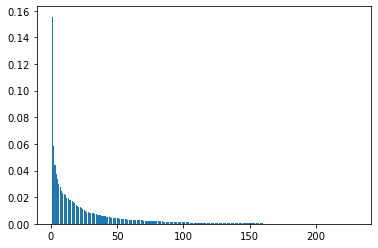

In [28]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [29]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

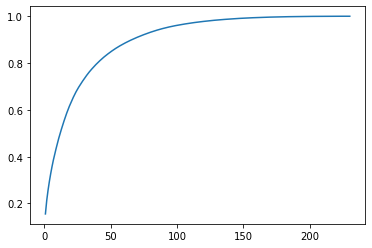

In [30]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [31]:
pc2 = PCA(n_components=8, random_state=42)

In [32]:
newdata = pc2.fit_transform(x)

In [33]:
newdata.shape

(1460, 8)

In [34]:
df = pd.DataFrame(newdata, columns= ['PC1',"PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
y=pd.DataFrame(y)
df.head()
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [35]:
print(df.shape)
print(y.shape)

(1460, 8)
(1460, 1)


In [36]:
df_final = pd.concat([df,y], axis=1)
df_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,SalePrice
0,2.002489,0.260652,-0.528568,-0.880013,-1.034111,-0.085527,-0.307780,-0.526570,208500
1,-0.714013,-0.501992,-0.217616,-0.374499,0.764110,0.471462,0.145356,0.437791,181500
2,2.342183,-0.503188,-0.955708,-0.461566,-0.108470,0.032820,-0.034036,-0.565493,223500
3,-0.271328,0.366511,-0.449613,1.113064,1.098547,-0.156366,-0.267959,0.282535,140000
4,2.327048,-0.634644,-1.149619,-0.261451,-0.003845,-0.119692,-0.036493,-0.461441,250000
...,...,...,...,...,...,...,...,...,...
1455,0.697028,0.831349,-1.017445,-0.090615,0.173094,-1.276628,0.703532,-0.342678,175000
1456,-0.895992,-1.264620,-0.416216,-0.475495,0.315422,-0.175275,0.371774,0.219035,210000
1457,0.154012,0.305194,-0.496877,0.867420,0.577698,0.665505,-0.834934,0.037319,266500
1458,-0.873949,-0.556896,1.017693,-0.350684,-0.049219,1.165200,-1.026145,-0.019216,142125


In [37]:
from sklearn.model_selection import train_test_split as tts

df_train, df_test = tts(df_final, train_size = 0.8, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1168, 9)
(292, 9)


In [38]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [39]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     230.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          2.38e-233
Time:                        12:29:45   Log-Likelihood:                -14277.
No. Observations:                1168   AIC:                         2.857e+04
Df Residuals:                    1159   BIC:                         2.862e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.807e+05   1447.291    124.843      0.000    1.78e+05    1.84e+05
PC1         3.705e+04   1047.293     35.381      0.000     3.5e+04    3.91e+04
PC2        -2.818e+04   1716.451    -16.416      0.000   -3.15e+04   -2.48e+04
PC3          821.6105   1964.040      0.418      0.676   -3031.862    4675.083
PC4         3.455e+04   2156.820     16.017      0.000    3.03e+04    3.88e+04
PC5         8542.1093   2263.956      3.773      0.000    4100.199     1.3e+04
PC6         8779.5802   2408.964      3.645      0.000    4053.162    1.35e+04
PC7         8709.6194   2485.819      3.504      0.000    3832.410    1.36e+04
PC8          124.8808   2639.153      0.047      0.962   -5053.171    5302.932
==============================================================================
Omnibus:                      727.429   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17213.279
Skew:                           2.446   Prob(JB):                         0.00
Kurtosis:                      21.160   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""